In [1]:
import networkx as nx
from operator import truediv
from scipy.sparse import csr_matrix
import math
import random
from collections import Counter
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm


In [2]:
mygraph = nx.read_gml('sem7.gml',label='id')


In [3]:
e=list(mygraph.edges())
L=list(mygraph.nodes())
edge_list = list(combinations(L, 2))
R1=[l[0] for l in edge_list]
R2=[l[1] for l in edge_list]
r1 = [lis[0] for lis in e]
r2 = [lis[1] for lis in e]

In [4]:
def DegreeofN(G,l):
    F2=[]
    for i in range(len(G.nodes)):
        a=mygraph.degree[l[i]]
        F2.append(a)
    return F2
F1=DegreeofN(mygraph,L)
print(F1)

[8, 13, 7, 9, 8, 11, 11, 7, 9, 3, 10, 12, 16, 0, 14, 10, 12, 9, 11, 12, 11, 17, 15, 14, 0, 13, 22, 9, 13, 13, 11, 11, 6, 21, 14, 20, 14, 8, 12, 11, 11, 12, 4, 3, 13, 16, 28, 28, 28, 16, 7, 9, 2, 1, 8, 14, 6, 0, 12, 8, 5, 6, 0, 12, 9, 15, 18, 18, 24, 13, 10, 12, 21, 12, 12, 12, 18, 13, 16, 21, 9, 7, 17, 15, 15, 9, 15, 11, 13, 14, 10, 8, 9, 12, 9, 8, 4, 25, 11, 11, 9, 12, 7, 13, 12, 13, 17, 11, 7, 17, 8, 16, 11, 4, 13, 9, 11, 17, 12, 19, 14, 10, 8, 0, 0, 2, 0, 0]


In [5]:
# Networkx appears not to implement their eigenvector centrality algorithm for MultiDiGraph objects, so you'd have to convert your object like:
G2 = nx.DiGraph(mygraph)
def Eigen_Centrality(G2):
    centrality = nx.eigenvector_centrality(G2, max_iter=1000)
    return list(centrality.values())
F4=Eigen_Centrality(G2)

In [6]:
def Betweeness(G):
    betweeness = nx.betweenness_centrality(G)
    return list(betweeness.values())
F5=Betweeness(mygraph)

In [7]:
G2 = nx.DiGraph(mygraph)
def Clustering(G):
    clustering_coeff =nx.clustering(G)
    return list(clustering_coeff.values())
F6=Clustering(G2)

Node Conductivity
Betweenness divided by Degree: which nodes can reach the most nodes in the different parts of the network faster with the least connections. Nodes with a high conductivity will tend to be better connected to the different distinct groups of nodes. They are reaching for global connections instead of the local ones. 

In [8]:
NC = []
def nodeConductivity(l):
    count=0
    for i in range(0, len(l)):
        if F1[i] == 0:
            NC.append(0)
        else:
            NC.append(F5[i]/F1[i])
        count=count+1
    return NC
F7=nodeConductivity(L)
print(len(F7))

128


Node Locality
Degree squared divided by Betweenness: Local influencers with the least global connections. Nodes with high locality measure will tend to have more connections within their local group of nodes.

In [9]:
def nodeLocality(l):
    NL=[]
    for i in range(len(l)):
        count=0
        if F1[i] == 0:
            NL.append(0)
        else:
            temp=math.sqrt(F1[i])
            NL.append(F5[i]/temp)
        count=count+1
    return NL
F8=nodeLocality(L)
print(len(F8))

128


In [10]:
print(F1)

[8, 13, 7, 9, 8, 11, 11, 7, 9, 3, 10, 12, 16, 0, 14, 10, 12, 9, 11, 12, 11, 17, 15, 14, 0, 13, 22, 9, 13, 13, 11, 11, 6, 21, 14, 20, 14, 8, 12, 11, 11, 12, 4, 3, 13, 16, 28, 28, 28, 16, 7, 9, 2, 1, 8, 14, 6, 0, 12, 8, 5, 6, 0, 12, 9, 15, 18, 18, 24, 13, 10, 12, 21, 12, 12, 12, 18, 13, 16, 21, 9, 7, 17, 15, 15, 9, 15, 11, 13, 14, 10, 8, 9, 12, 9, 8, 4, 25, 11, 11, 9, 12, 7, 13, 12, 13, 17, 11, 7, 17, 8, 16, 11, 4, 13, 9, 11, 17, 12, 19, 14, 10, 8, 0, 0, 2, 0, 0]


In [11]:
print(F5)

[0.0004821746222659886, 0.019149914700776736, 0.00253043802567943, 0.0006279028649065052, 0.001017902648948768, 0.01468111082959778, 0.012561086431768134, 0.018756269940250057, 0.005043578597506644, 0.0, 0.0012920540936872608, 0.012807188707054848, 0.047343831142447675, 0.0, 0.020724210019564933, 0.0025016846143780555, 0.01860483105835397, 0.007647988724449562, 0.05476020237759626, 0.0094231446477436, 0.005643985781501488, 0.039915525299455544, 0.04143255021693492, 0.033264164855290754, 0.0, 0.024747293858608098, 0.06577595344347334, 0.011723990837952255, 0.009935095418861057, 0.0121804610399717, 0.004663553406604317, 0.0003667207266757323, 0.0005607494329951815, 0.004903946196788275, 0.029488771564184005, 0.037900144469775104, 0.0028178961903856286, 0.00016175290359767298, 0.0051972881015831755, 0.04110120516357274, 0.007102347152441445, 0.01915161824979391, 0.006603961510783339, 0.000431882827833334, 0.013648446753474635, 0.011067136072188727, 0.04991522762915704, 0.0311343214199872,

In [22]:
node_attributes = list(mygraph.nodes[1].values())[5:]
# node_attributes.remove('A')
# print(node_attributes)
# s= sum(node_attributes)
print(node_attributes)

[48, 93, 95, 46, 85, 89, 48, 78, 87, 37, 71, 73, 40, 66, 73, 46, 49, 71, 44, 78, 83, 45, 90, 90, 82, 47, 87, 91, 46, 90, 91, 45, 80, 85, 47, 82, 88, 48, 75, 86, 40, 44, 62, 36, 64, 68, 46, 64, 78, 81, 'A', 47, 82, 88, 43, 75, 81, 46, 88, 90, 45, 71, 81, 46, 76, 84, 85, 42, 83, 84, 40, 88, 84, 49, 93, 96, 44, 71, 80, 47, 83, 89, 87]


In [13]:
print(len(L))

128


In [20]:
print(mygraph.nodes[1])

{'name': '2', 'Gender': 'female', 'Locality': 'L', 'LateralEntry': 0, 'Backlog': 0, 'Maths1CIE': 48, 'Maths1SEE': 93, 'Maths1Final': 95, 'ChemCIE': 46, 'ChemSEE': 85, 'ChemFinal': 89, 'BEECIE': 48, 'BEESEE': 78, 'BEEFinal': 87, 'EEDCIE': 37, 'EEDSEE': 71, 'EEDFinal': 73, 'ENMCIE': 40, 'ENMSEE': 66, 'ENMFinal': 73, 'Colab2CIE': 46, 'Colab2SEE': 49, 'Colab2Final': 71, 'EYSCIE': 44, 'EYSSEE': 78, 'EYSFinal': 83, 'CIPCIE': 45, 'CIPSEE': 90, 'CIPFinal': 90, 'X1stSemPercentage': 82, 'Maths2CIE': 47, 'Maths2SEE': 87, 'Maths2Final': 91, 'PHYCIE': 46, 'PHYSEE': 90, 'PHYFinal': 91, 'EEECIE': 45, 'EEESEE': 80, 'EEEFinal': 85, 'EMECIE': 47, 'EMESEE': 82, 'EMEFinal': 88, 'CCPCIE': 48, 'CCPSEE': 75, 'CCPFinal': 86, 'Colab1CIE': 40, 'Colab1SEE': 44, 'Colab1Final': 62, 'BIECIE': 36, 'BIESEE': 64, 'BIEFinal': 68, 'PDCCIE': 46, 'PDCSEE': 64, 'PDCFinal': 78, 'X2ndSemPercentage': 81, 'Section': 'A', 'PCPCIE': 47, 'PCPSEE': 82, 'PCPFinal': 88, 'TFCCIE': 43, 'TFCSEE': 75, 'TFCFinal': 81, 'DMSCIE': 46, 'DMSS

In [16]:
print(node_attributes)

[89, 48, 78, 87, 37, 71, 73, 40, 66, 73, 46, 49, 71, 44, 78, 83, 45, 90, 90, 82, 47, 87, 91, 46, 90, 91, 45, 80, 85, 47, 82, 88, 48, 75, 86, 40, 44, 62, 36, 64, 68, 46, 64, 78, 81, 47, 82, 88, 43, 75, 81, 46, 88, 90, 45, 71, 81, 46, 76, 84, 85, 42, 83, 84, 40, 88, 84, 49, 93, 96, 44, 71, 80, 47, 83, 89, 87]


In [24]:
def avg(lst):
    S = sum(lst)
    l=len(lst)
    average =S/l
    return average
percent=[]

for i in range(len(L)):
    node_attributes = list(mygraph.nodes[i].values())[5:]
    del node_attributes[50]
    percent.append(avg(node_attributes))
print(percent)

[59.96341463414634, 69.09756097560975, 50.329268292682926, 59.78048780487805, 40.78048780487805, 60.53658536585366, 73.82926829268293, 60.58536585365854, 68.54878048780488, 55.048780487804876, 42.18292682926829, 70.14634146341463, 75.97560975609755, 38.52439024390244, 56.68292682926829, 44.146341463414636, 60.68292682926829, 51.90243902439025, 56.8780487804878, 62.8780487804878, 58.6219512195122, 66.6219512195122, 67.42682926829268, 52.68292682926829, 39.19512195121951, 73.8780487804878, 56.02439024390244, 59.951219512195124, 66.63414634146342, 49.1219512195122, 47.15853658536585, 56.13414634146341, 63.292682926829265, 64.96341463414635, 62.91463414634146, 67.70731707317073, 60.390243902439025, 63.5, 51.19512195121951, 67.70731707317073, 71.53658536585365, 58.69512195121951, 59.78048780487805, 49.292682926829265, 51.0, 43.74390243902439, 62.65853658536585, 42.96341463414634, 45.28048780487805, 64.85365853658537, 59.15853658536585, 28.121951219512194, 15.390243902439025, 16.817073170731

In [23]:
node_attributes = list(mygraph.nodes[1].values())[5:]
print(node_attributes.index('A'))
del node_attributes[50]
print(node_attributes)

50
[48, 93, 95, 46, 85, 89, 48, 78, 87, 37, 71, 73, 40, 66, 73, 46, 49, 71, 44, 78, 83, 45, 90, 90, 82, 47, 87, 91, 46, 90, 91, 45, 80, 85, 47, 82, 88, 48, 75, 86, 40, 44, 62, 36, 64, 68, 46, 64, 78, 81, 47, 82, 88, 43, 75, 81, 46, 88, 90, 45, 71, 81, 46, 76, 84, 85, 42, 83, 84, 40, 88, 84, 49, 93, 96, 44, 71, 80, 47, 83, 89, 87]


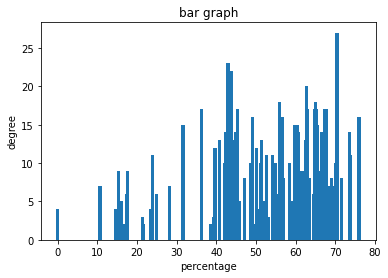

In [60]:
import matplotlib.pyplot as plt

# Plot line graph
plt.bar(percent, F1)

# Add labels and title
plt.xlabel('percentage')
plt.ylabel('degree')
plt.title('bar graph')

# Show plot
plt.show()


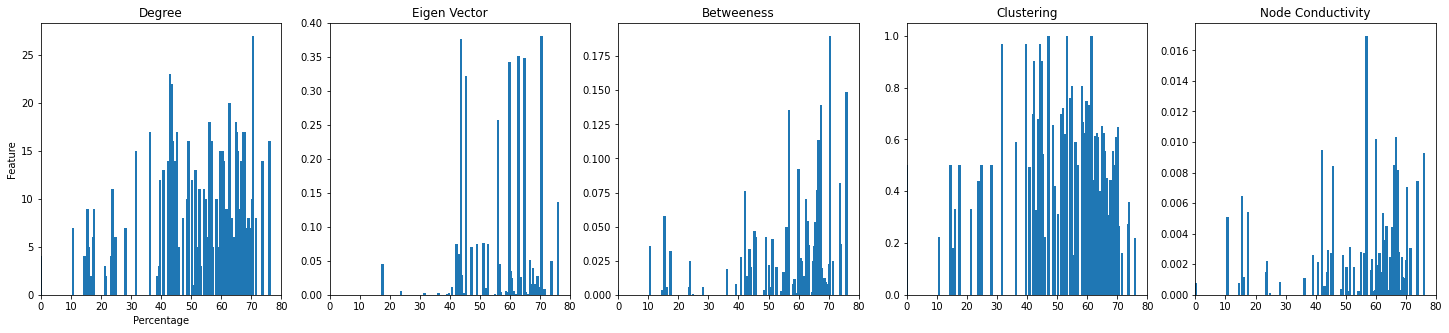

<Figure size 432x288 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# generate some data
x = percent
y1 = F1
y2 = F4
y3 = F5
y4 = F6
y5 = F7
y6 = F8

# create a figure and 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
axs[0].bar(x, y1)
axs[1].bar(x, y2)
axs[2].bar(x, y3)
axs[3].bar(x, y4)
axs[4].bar(x, y5)
# axs[5].bar(x, y6)
# Set titles and axis labels for the subplots
axs[0].set_title('Degree')
axs[1].set_title('Eigen Vector')
axs[2].set_title('Betweeness')
axs[3].set_title('Clustering')
axs[4].set_title('Node Conductivity')
# axs[5].set_title('Node locality')
axs[0].set_xlabel('Percentage')
axs[0].set_ylabel('Feature')
axs[0].set_xlim(0, 80)
axs[1].set_xlim(0, 80)
axs[2].set_xlim(0, 80)
axs[3].set_xlim(0, 80)
axs[4].set_xlim(0, 80)

# Show the plot
plt.show()


# adjust the layout
plt.tight_layout()

# show the plot
plt.show()


In [62]:
name =mygraph.nodes[1]['Section']

In [63]:
print(len(F7))

128


In [64]:
print(avg(y5)

SyntaxError: unexpected EOF while parsing (<ipython-input-64-a6aa20e9da0e>, line 1)